<a href="https://colab.research.google.com/github/vasubajaj7/DataScienceAcaddemy/blob/main/ML/Classification_Recall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score , train_test_split , RandomizedSearchCV , GridSearchCV
from sklearn.metrics import classification_report
from scipy import stats

In [6]:
# Reading the data dictionary file

data_dict = pd.read_csv('/content/drive/MyDrive/data/pima_indian_diabetes_data_dictionary.csv')
data_dict.head(10)

,No_Times_Pregnant,Number of times pregnant
0,Plasma_Glucose,Plasma glucose concentration after 2 hours in ...
1,Diastolic_BP,Diastolic blood pressure (mm Hg)
2,Triceps,Triceps skin fold thickness (mm)
3,Insulin,2-Hour serum insulin (mu U/ml)
4,BMI,Body mass index (weight in kg/(height in m)^2)
5,Age,Age (years)
6,Diabetes,Class variable (0 or 1)


In [80]:

data = pd.read_csv('/content/drive/MyDrive/data/pima_indian_diabetes.csv')

In [81]:
data.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,1
2,3,78,50,32,88,31.0,26,1
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,1


In [9]:
data.isnull().sum()

No_Times_Pregnant    0
Plasma_Glucose       0
Diastolic_BP         0
Triceps              0
Insulin              0
BMI                  0
Age                  0
Diabetes             0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No_Times_Pregnant  392 non-null    int64  
 1   Plasma_Glucose     392 non-null    int64  
 2   Diastolic_BP       392 non-null    int64  
 3   Triceps            392 non-null    int64  
 4   Insulin            392 non-null    int64  
 5   BMI                392 non-null    float64
 6   Age                392 non-null    int64  
 7   Diabetes           392 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 24.6 KB


In [11]:
data.describe()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,81.000000,1.000000


# EDA and Outlier Detection

**Pregnancies**

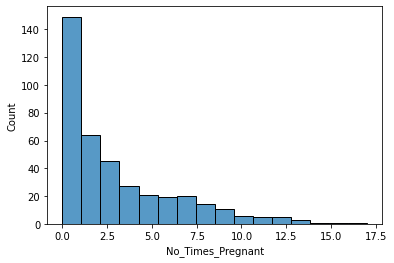

In [14]:
sns.histplot(data['No_Times_Pregnant'])

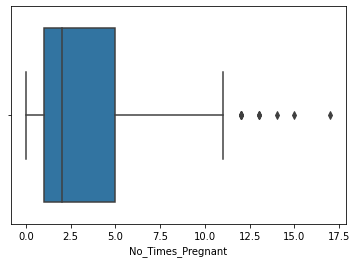

In [15]:
sns.boxplot(data['No_Times_Pregnant'])

In [19]:
data[data['No_Times_Pregnant'] > 11]

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
13,13.0,145,82,19,110,22.2,57,0
103,12.0,151,70,40,271,41.8,38,1
122,12.0,92,62,7,258,27.6,44,1
161,13.0,152,90,33,29,26.8,43,1
177,12.0,88,74,40,54,35.3,48,0
188,12.0,140,82,43,325,39.2,58,1
382,13.0,153,88,37,140,40.6,39,0
383,12.0,100,84,33,105,30.0,46,0


In [20]:
data.loc[data['No_Times_Pregnant'] > 11 , 'No_Times_Pregnant'] = np.nan

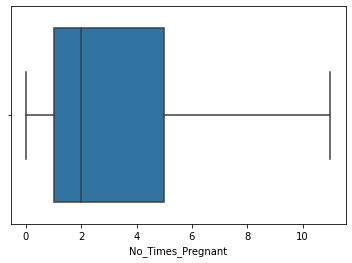

In [21]:
sns.boxplot(data['No_Times_Pregnant'])

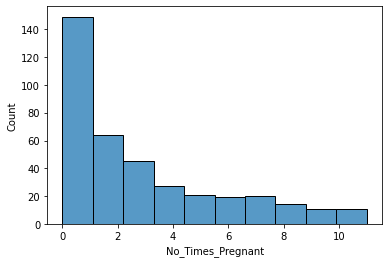

In [22]:
sns.histplot(data['No_Times_Pregnant'])

In [23]:
data['No_Times_Pregnant'].isnull().sum()

11

**Glucose**

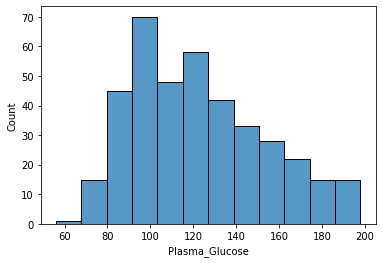

In [24]:
sns.histplot(data['Plasma_Glucose'])

In [25]:
data.loc[data['Plasma_Glucose'] < 50 , 'Plasma_Glucose']

Series([], Name: Plasma_Glucose, dtype: int64)

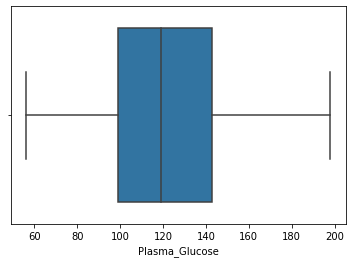

In [26]:
sns.boxplot(data['Plasma_Glucose'])

In [27]:
data.loc[data['Plasma_Glucose'] < 40 , 'Plasma_Glucose'] = np.nan

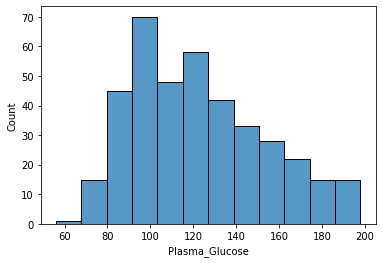

In [29]:
sns.histplot(data['Plasma_Glucose'])

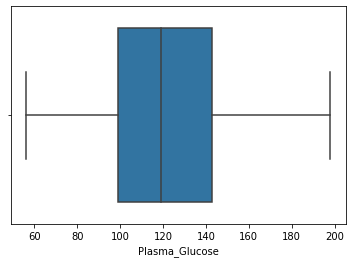

In [30]:
sns.boxplot(data['Plasma_Glucose'])

**BloodPressure**

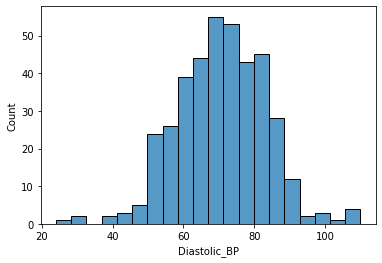

In [31]:
sns.histplot(data['Diastolic_BP'])

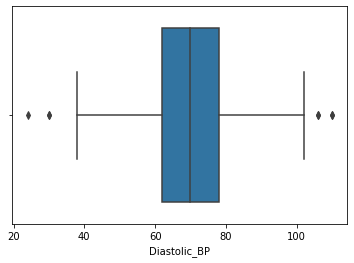

In [32]:
sns.boxplot(data['Diastolic_BP'])

In [33]:
data.loc[data['Diastolic_BP'] < 40 , 'Diastolic_BP'] = np.nan

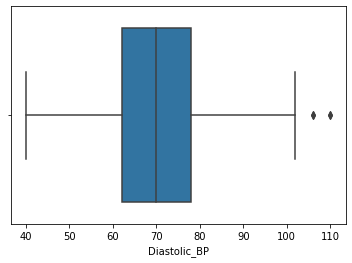

In [34]:
sns.boxplot(data['Diastolic_BP'])

In [35]:
data.loc[data['Diastolic_BP'] > 120]

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes


In [36]:
data.loc[data['Diastolic_BP'] > 120 , 'Diastolic_BP'] = np.nan

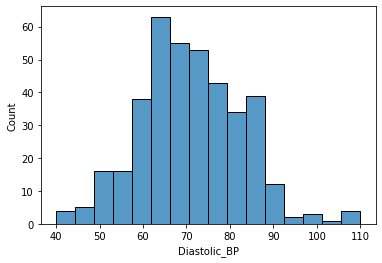

In [37]:
sns.histplot(data['Diastolic_BP'])

**Triceps**

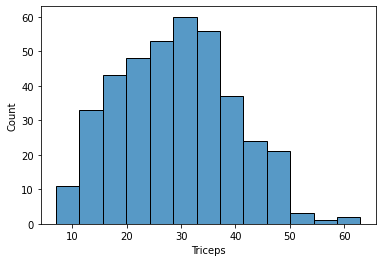

In [38]:
sns.histplot(data['Triceps'])

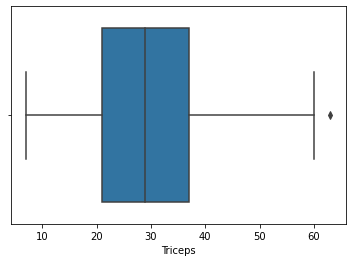

In [39]:
sns.boxplot(data['Triceps'])

In [40]:
data.loc[data['Triceps'] < 12 ]

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
15,3.0,88.0,58.0,11,54,24.8,22,0
20,1.0,103.0,80.0,11,82,19.4,22,0
122,NaN,92.0,62.0,7,258,27.6,44,1
131,2.0,108.0,62.0,10,278,25.3,22,0
156,3.0,113.0,50.0,10,85,29.5,25,0
158,3.0,99.0,80.0,11,64,19.3,30,0
193,1.0,109.0,60.0,8,182,25.4,21,0
222,1.0,80.0,74.0,11,60,30.0,22,0
239,0.0,74.0,52.0,10,36,27.8,22,0
265,6.0,129.0,90.0,7,326,19.6,60,0


In [41]:
data.loc[data['Triceps'] <12  , 'Triceps'] = np.nan

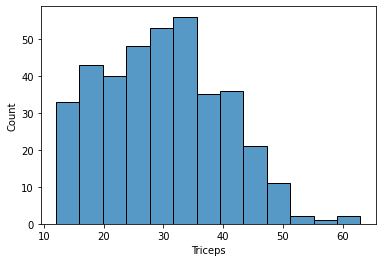

In [42]:
sns.histplot(data['Triceps'])

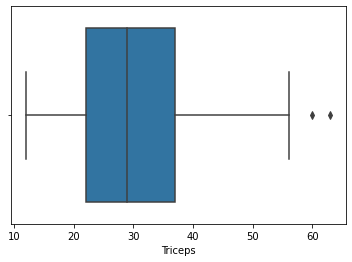

In [45]:
sns.boxplot(data['Triceps'])

In [44]:
data.loc[data['Triceps'] > 59 ]

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
26,0.0,100.0,88.0,60.0,110,46.8,31,0
225,0.0,180.0,78.0,63.0,14,59.4,25,1


**Insulin**

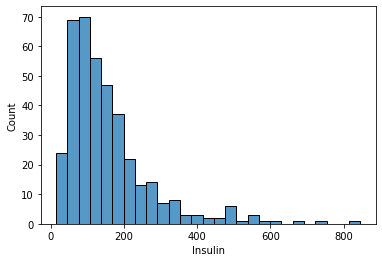

In [46]:
sns.histplot(data['Insulin'])

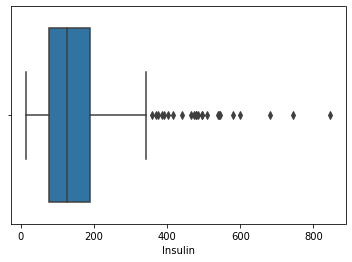

In [47]:
sns.boxplot(data['Insulin'])

In [48]:
data.loc[data['Insulin'] == 0 ]

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes


In [49]:
data.loc[data['Insulin'] == 0 , 'Insulin'] = np.nan

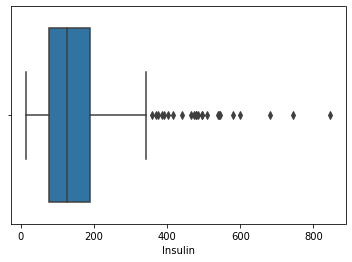

In [50]:
sns.boxplot(data['Insulin'])

In [ ]:
data.loc[data['Insulin'] > 500]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59,1
228,4.0,197.0,70.0,39.0,744.0,36.7,2.329,31,0
247,0.0,165.0,90.0,33.0,680.0,52.3,0.427,23,0
286,5.0,155.0,84.0,44.0,545.0,38.7,0.619,34,0
409,1.0,172.0,68.0,49.0,579.0,42.4,0.702,28,1
584,8.0,124.0,76.0,24.0,600.0,28.7,0.687,52,1
655,2.0,155.0,52.0,27.0,540.0,38.7,0.240,25,1
753,0.0,181.0,88.0,44.0,510.0,43.3,0.222,26,1


In [51]:
data.loc[data['Insulin'] > 500 , 'Insulin'] = np.nan

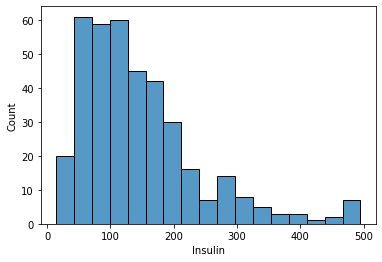

In [52]:
sns.histplot(data['Insulin'])

**BMI**

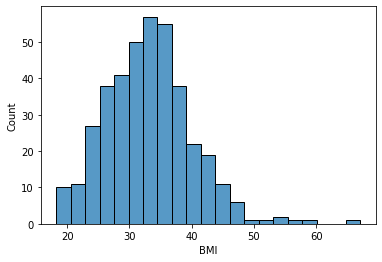

In [53]:
sns.histplot(data['BMI'])

In [54]:
data.loc[data['BMI'] == 0 , 'BMI'] = np.nan

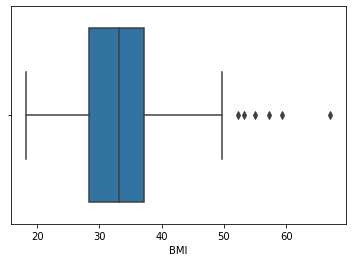

In [55]:
sns.boxplot(data['BMI'])

In [56]:
data.loc[data['BMI'] > 60]

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
86,0.0,129.0,110.0,46.0,130.0,67.1,26,1


**Age**

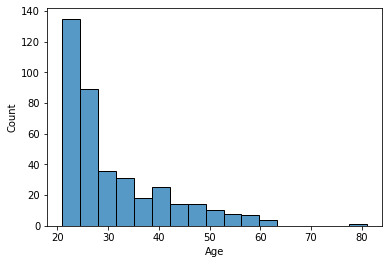

In [58]:
sns.histplot(data['Age'])

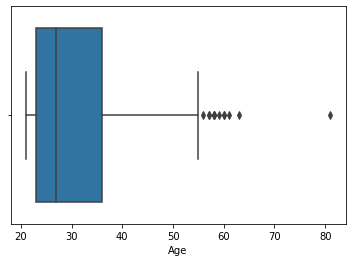

In [59]:
sns.boxplot(data['Age'])

**Diabetes**

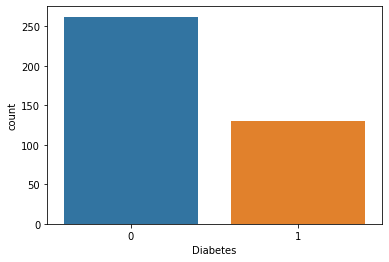

In [61]:
sns.countplot(data['Diabetes'])

# Correlation

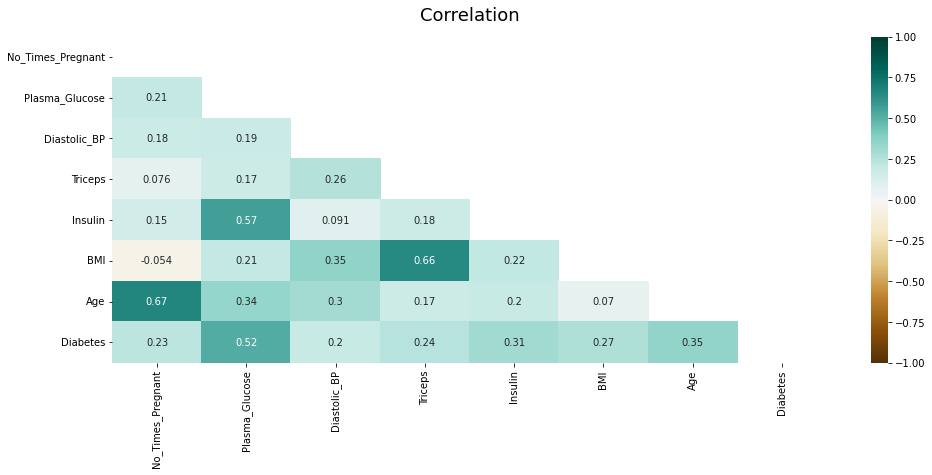

In [62]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=16);

# Missing Data

In [63]:
data.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1.0,89.0,66.0,23.0,94.0,28.1,21,0
1,0.0,137.0,40.0,35.0,168.0,43.1,33,1
2,3.0,78.0,50.0,32.0,88.0,31.0,26,1
3,2.0,197.0,70.0,45.0,NaN,30.5,53,1
4,1.0,189.0,60.0,23.0,NaN,30.1,59,1


In [64]:
data.isnull().sum()

No_Times_Pregnant    11
Plasma_Glucose        0
Diastolic_BP          4
Triceps              11
Insulin               9
BMI                   0
Age                   0
Diabetes              0
dtype: int64

In [65]:
X = data.drop(columns=['Diabetes'])
y = data['Diabetes']

In [66]:
imputer = KNNImputer(n_neighbors=5)
imputer.fit(X)

KNNImputer()

In [67]:
X = imputer.transform(X)

# StandardScaler

In [68]:
st = StandardScaler()
st.fit(X)
X = st.transform(X)


#new_value =(x-xmin)/(xmax-xmin)
#inverse_scaler = (new_value * (xmax-xmin)) + Xmin

# Train Test Split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [82]:
X_train

array([[-0.75338552, -1.15593581,  0.58829416, ..., -1.21158416,
         0.2156778 , -0.87014206],
       [ 0.33504368, -0.37725587,  0.07959274, ...,  0.62322545,
         0.57186964,  2.46719705],
       [-0.39057579, -1.77239077, -0.76824297, ..., -1.38982281,
        -1.8502349 , -0.77198503],
       ...,
       [-1.11619525, -0.18258588, -0.42910868, ...,  0.42401755,
        -0.32573381, -0.87014206],
       [-0.02776605,  0.01208411,  2.45353272, ...,  0.96921811,
         3.44989974, -0.87014206],
       [ 2.14909235, -0.34481087,  0.92742845, ...,  0.2877174 ,
         0.1586871 ,  0.50405639]])

# Model

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

models = {
    "lr" : LogisticRegression(random_state=123),
    "DT" : DecisionTreeClassifier(random_state=123),
    "RF" : RandomForestClassifier(max_depth=2, random_state=123),
    'KNN' : KNeighborsClassifier(),
    "SVM" : SVC(),
    "Ada" : AdaBoostClassifier(random_state=123),
    "GBC" : GradientBoostingClassifier(random_state=123),
    "HGBC" : HistGradientBoostingClassifier(random_state=123)
}

In [73]:
for model_name, model in models.items():
    print(model_name + " :")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(cv_scores)
    print("mean :", cv_scores.mean())
    print("std :", cv_scores.std())
    print("\n")

lr :
[0.69090909 0.8        0.78181818 0.81818182 0.81481481]
mean : 0.7811447811447813
std : 0.04691239882734762


DT :
[0.8        0.69090909 0.74545455 0.63636364 0.72222222]
mean : 0.718989898989899
std : 0.05456939242780521


RF :
[0.72727273 0.70909091 0.76363636 0.78181818 0.7962963 ]
mean : 0.7556228956228956
std : 0.03278320309820466


KNN :
[0.78181818 0.76363636 0.72727273 0.78181818 0.77777778]
mean : 0.7664646464646464
std : 0.02070485329344478


SVM :
[0.69090909 0.78181818 0.76363636 0.81818182 0.7962963 ]
mean : 0.7701683501683502
std : 0.04347039977592827


Ada :
[0.69090909 0.70909091 0.69090909 0.69090909 0.77777778]
mean : 0.7119191919191918
std : 0.033673804502649916


GBC :
[0.72727273 0.74545455 0.74545455 0.74545455 0.7962963 ]
mean : 0.751986531986532
std : 0.023247055300751947


HGBC :
[0.69090909 0.76363636 0.72727273 0.78181818 0.83333333]
mean : 0.7593939393939394
std : 0.04839385400649002




# GridSearch for Fine-Tune Model

In [74]:
Ada = AdaBoostClassifier(random_state=123 )

grid_list = {
    "learning_rate": [1,0.01,0.001],
    "n_estimators": [20,15,10,5],
}
              
grid_search = GridSearchCV(Ada, param_grid = grid_list, cv = 4,) 
grid_search.fit(X_train , y_train)


print("gridSearch Best Score :",grid_search.best_score_)
print("gridSearch Best params :",grid_search.best_params_)

gridSearch Best Score : 0.7885230179028133
gridSearch Best params : {'learning_rate': 1, 'n_estimators': 10}


**Best Model**

In [75]:
bestModel = AdaBoostClassifier(random_state=123 , learning_rate= 1, n_estimators= 20)

In [76]:
bestModel.fit(X_train,y_train)
y_pred = bestModel.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81        80
           1       0.59      0.58      0.59        38

    accuracy                           0.74       118
   macro avg       0.70      0.70      0.70       118
weighted avg       0.74      0.74      0.74       118

